## Training SVM classifier on DD dataset

The first step is to read dataset from CSV file

In [ ]:
import pandas as pd

dd_dataset = pd.read_csv('./dataset/DD_dataset.csv')

In [3]:
dd_dataset.head()

,Fold,Protein name,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,...,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20
0,Globm-like(alpha),2LHB,27.516779,41.610738,30.872483,10.810811,10.135135,11.486486,3.0,53.00,...,0.0,27.25,59.5,106.50,148.0,1.0,40.25,82.0,120.25,144.0
1,Globm-like(alpha),3SDHA,34.246575,34.246575,31.506849,8.965517,11.724138,11.724138,4.0,33.75,...,0.0,32.50,67.5,110.25,144.0,2.0,41.75,79.5,108.75,145.0
2,Globm-like(alpha),1FLP,26.056338,47.183099,26.760563,13.475177,8.510638,11.347518,2.0,41.00,...,0.0,27.50,64.0,105.00,139.0,1.0,38.25,72.5,110.50,141.0
3,Globm-like(alpha),2HBG,23.129252,48.979592,27.891156,9.589041,8.219178,13.698630,5.0,29.00,...,0.0,40.25,72.0,112.75,146.0,1.0,34.00,67.0,105.00,144.0
4,Globm-like(alpha),2MGE,32.467532,37.012987,30.519481,13.725490,11.764706,9.150327,4.0,42.50,...,3.0,51.00,88.0,119.00,153.0,0.0,28.50,66.0,106.50,149.0


Convert class lables to unique integers

In [4]:
dd_dataset.insert(1, 'class labels', pd.factorize(dd_dataset.Fold)[0])

In [5]:
dd_dataset.head()

,Fold,class labels,Protein name,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,...,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Feature17,Feature18,Feature19,Feature20
0,Globm-like(alpha),0,2LHB,27.516779,41.610738,30.872483,10.810811,10.135135,11.486486,3.0,...,0.0,27.25,59.5,106.50,148.0,1.0,40.25,82.0,120.25,144.0
1,Globm-like(alpha),0,3SDHA,34.246575,34.246575,31.506849,8.965517,11.724138,11.724138,4.0,...,0.0,32.50,67.5,110.25,144.0,2.0,41.75,79.5,108.75,145.0
2,Globm-like(alpha),0,1FLP,26.056338,47.183099,26.760563,13.475177,8.510638,11.347518,2.0,...,0.0,27.50,64.0,105.00,139.0,1.0,38.25,72.5,110.50,141.0
3,Globm-like(alpha),0,2HBG,23.129252,48.979592,27.891156,9.589041,8.219178,13.698630,5.0,...,0.0,40.25,72.0,112.75,146.0,1.0,34.00,67.0,105.00,144.0
4,Globm-like(alpha),0,2MGE,32.467532,37.012987,30.519481,13.725490,11.764706,9.150327,4.0,...,3.0,51.00,88.0,119.00,153.0,0.0,28.50,66.0,106.50,149.0


Create a training set from pandas data frame

In [11]:
train_data = dd_dataset[['Feature%d' % i for i in range(21)]].values
labels = dd_dataset['class labels'].values

print("Number of samples: %d, Number of features: %d" % (train_data.shape[0], train_data.shape[1]))

int64
Number of samples: 311, Number of features: 21


## Data analysis

Text(0,0.5,'Number of proteins')

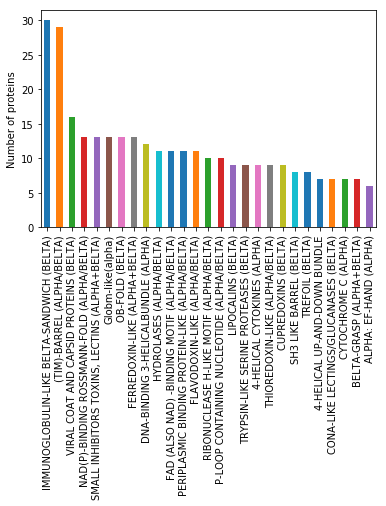

In [46]:
# Frequency of folds
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
freq_plot = dd_dataset['Fold'].value_counts().plot(ax=ax, kind='bar')
freq_plot.set_ylabel('Number of proteins')

## SVM classifier

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Hyperparameters
kernel = 'rbf'

# An instance of SVM classifier
svm_cl = SVC(kernel=kernel)

Define range of parameters for Grid Search

In [38]:
# Penalty parameter
c_range = {'C': [float(2**i) for i in range(-5, 6)]}
# Gamma parameter for RBF kernel
gamma_range = {'gamma': [float(2**i) for i in range(-10, 3)]} if kernel == 'rbf' else {}

param_range = {**c_range, **gamma_range}

# Arguments for grid search
cv_fold = 5
n_workers = 2 # Number of CPU threads

result = GridSearchCV(svm_cl, param_range, cv=cv_fold, n_jobs=n_workers, refit=False,
                      verbose=1)

Start grid search!

In [39]:
result.fit(train_data, labels)

Fitting 5 folds for each of 143 candidates, totalling 715 fits


[Parallel(n_jobs=2)]: Done 414 tasks      | elapsed:    4.7s
[Parallel(n_jobs=2)]: Done 715 out of 715 | elapsed:    7.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0], 'gamma': [0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring=None, verbose=1)

Best results

In [40]:
print("Best accuracy: %.2f" % (result.best_score_ * 100))

Best accuracy: 25.40
